1. Определить задачу: регрессия или классификация.
2. Определить достижимый уровень качества модели.
3. Выбрать ориентир.
4. Выполнить анализ применимости алгоритмов обучения с учителем для решения поставленной задачи.
5. Выбрать не менее трех моделей для решения задачи.
6. Построить конвейер.
7. Реализовать настройку гиперпараметров для каждой модели.
8. Обучить модели.
9. Оценить качество моделей для решения поставленной задачи. Выбор метрик необходимо обосновать.
10. Оценить смещение и дисперсию лучших моделей.

# Классификация

#### Загрузка набора данных

In [87]:
import pandas as pd

from sklearn import set_config

set_config(transform_output="pandas")

random_state=9

df = pd.read_excel("data/India_tourist_places.xlsx")


df['DSLRAllowed'] = df['DSLRAllowed'].map({'Yes': 1, 'No': 0})

df

,Zone,State,City,Name,Type,EstablishmentYear,TimeNeededToVisitInHrs,GoogleReviewRating,EntranceFeeInINR,AirportWith50kmRadius,WeeklyOff,Significance,DSLRAllowed,NumberOfGoogleReviewInLakhs,BestTimeToVisit,ImageURL
0,Western,Gujarat,Rann of Kutch,Rann Utsav,Cultural,Unknown,3.0,4.9,7500,Yes,NaN,Cultural,1,0.10,Evening,https://www.rannutsav.com/blog/wp-content/uplo...
1,Northern,Punjab,Amritsar,Golden Temple (Harmandir Sahib),Religious Site,1604,1.5,4.9,0,Yes,NaN,Spiritual,1,1.90,All,https://upload.wikimedia.org/wikipedia/commons...
2,Northern,Ladakh,Leh,Pangong Tso,Lake,Unknown,2.0,4.9,20,Yes,NaN,Nature,1,0.15,Morning,https://dynamic-media-cdn.tripadvisor.com/medi...
3,Western,Maharastra,Mumbai,Siddhivinayak Temple,Temple,1881,2.0,4.8,0,Yes,NaN,Religious,0,1.05,All,https://upload.wikimedia.org/wikipedia/commons...
4,Western,Gujarat,Somnath,Somnath Temple,Temple,1951,2.0,4.8,0,No,NaN,Religious,0,0.39,Morning,https://upload.wikimedia.org/wikipedia/commons...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,Southern,Tamil Nadu,Kodaikanal,Kodaikanal Lake,Lake,1863,2.0,3.9,0,No,NaN,Recreational,1,0.10,Morning,https://upload.wikimedia.org/wikipedia/commons...
298,Southern,Kerala,Kumarakom,Kumarakom Bird Sanctuary,Bird Sanctuary,1972,2.0,3.8,50,Yes,NaN,Wildlife,1,0.10,All,https://dynamic-media-cdn.tripadvisor.com/medi...
299,Northern,Himachal Pradesh,Kufri,Kufri Fun World,Ski Resort,1975,5.0,3.8,1500,Yes,NaN,Recreational,1,0.10,All,https://i.ytimg.com/vi/W_7-8Bx9_Wk/maxresdefau...
300,Northern,Ladakh,Leh,Magnetic Hill,Gravity Hill,Unknown,0.5,3.7,0,Yes,NaN,Nature,1,0.10,All,https://upload.wikimedia.org/wikipedia/commons...


#### Разделение набора данных на обучающую и тестовые выборки (80/20) для задачи классификации

Целевой признак -- DSLRAllowed

In [156]:
from src.utils import split_stratified_into_train_val_test

X_train, X_val, X_test, y_train, y_val, y_test = split_stratified_into_train_val_test(
    df, stratify_colname="DSLRAllowed", frac_train=0.80, frac_val=0, frac_test=0.20, random_state=random_state
)

display("X_train", X_train)
display("y_train", y_train)

display("X_test", X_test)
display("y_test", y_test)

'X_train'

,Zone,State,City,Name,Type,EstablishmentYear,TimeNeededToVisitInHrs,GoogleReviewRating,EntranceFeeInINR,AirportWith50kmRadius,WeeklyOff,Significance,DSLRAllowed,NumberOfGoogleReviewInLakhs,BestTimeToVisit,ImageURL
143,Southern,Goa,Goa,Aguada Beach,Beach,Unknown,2.0,4.5,0,Yes,NaN,Scenic,1,0.01,Evening,https://dynamic-media-cdn.tripadvisor.com/medi...
223,Western,Maharastra,Lonavala,Karla Caves,Cave,200,1.5,4.4,25,Yes,Yes,Historical,1,0.27,Afternoon,https://upload.wikimedia.org/wikipedia/commons...
212,Western,Gujarat,Ahmedabad,Science City,Science,2002,7.0,4.4,500,Yes,Monday,Educational,1,0.11,All,https://assets.simpleviewinc.com/simpleview/im...
222,Western,Maharastra,Pune,Shaniwar Wada,Fort,1732,2.0,4.4,50,Yes,NaN,Historical,1,1.20,All,https://upload.wikimedia.org/wikipedia/commons...
141,Southern,Goa,Goa,Se Cathedral,Church,1640,1.0,4.5,0,Yes,NaN,Historical,1,0.05,Afternoon,https://upload.wikimedia.org/wikipedia/commons...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,Central,Madhya Pradesh,Orchha,Orchha Fort,Fort,1500,1.5,4.8,10,No,NaN,Historical,1,0.10,Afternoon,https://dynamic-media-cdn.tripadvisor.com/medi...
68,Southern,Andaman and Nicobar Islands,Port Blair,Cellular Jail,Landmark,1906,1.5,4.7,30,Yes,Monday,Historical,1,0.12,Afternoon,https://upload.wikimedia.org/wikipedia/commons...
156,Southern,Karnataka,Mangalore,Panambur Beach,Beach,Unknown,1.5,4.5,0,Yes,NaN,Recreational,1,0.10,All,https://karnatakatourism.org/wp-content/upload...
44,Northern,Himachal Pradesh,dalhousie,Dalai Lama Temple,Temple,1959,1.5,4.7,0,Yes,NaN,Religious,0,0.15,All,https://customtoursindia.com/wp-content/upload...


'y_train'

,DSLRAllowed
143,1
223,1
212,1
222,1
141,1
...,...
9,1
68,1
156,1
44,0


'X_test'

,Zone,State,City,Name,Type,EstablishmentYear,TimeNeededToVisitInHrs,GoogleReviewRating,EntranceFeeInINR,AirportWith50kmRadius,WeeklyOff,Significance,DSLRAllowed,NumberOfGoogleReviewInLakhs,BestTimeToVisit,ImageURL
227,Central,Madhya Pradesh,Amarkantak,Narmada Udgam Temple,Temple,1200,1.0,4.4,0,No,NaN,Religious,1,0.01,All,https://dynamic-media-cdn.tripadvisor.com/medi...
42,Central,Madhya Pradesh,Bhopal,Sanchi Stupa,Monument,-300,1.5,4.7,30,Yes,NaN,Historical,1,0.01,Afternoon,https://upload.wikimedia.org/wikipedia/commons...
163,Northern,Himachal Pradesh,Dalhousie,Khajjiar Lake,Lake,Unknown,1.5,4.5,0,No,NaN,Nature,1,0.10,Morning,https://upload.wikimedia.org/wikipedia/commons...
200,Southern,Telangana,Hyderabad,Golconda Fort,Fort,1600,2.0,4.4,30,Yes,NaN,Historical,1,1.20,Morning,https://upload.wikimedia.org/wikipedia/commons...
4,Western,Gujarat,Somnath,Somnath Temple,Temple,1951,2.0,4.8,0,No,NaN,Religious,0,0.39,Morning,https://upload.wikimedia.org/wikipedia/commons...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,Southern,Kerala,Kochi,Fort Kochi,Site,1503,1.0,4.4,0,Yes,NaN,Historical,1,0.10,All,https://upload.wikimedia.org/wikipedia/commons...
88,Western,Gujarat,Bhuj,White Desert,Site,1950,2.5,4.6,0,Yes,NaN,Nature,1,0.12,Evening,https://upload.wikimedia.org/wikipedia/commons...
243,Southern,Andhra Pradesh,Guntur,Uppalapadu Bird Sanctuary,Bird Sanctuary,Unknown,1.0,4.4,10,Yes,NaN,Wildlife,1,0.70,All,https://dynamic-media-cdn.tripadvisor.com/medi...
60,Southern,Andhra Pradesh,Srisailam,Mallikarjuna Swamy Temple,Temple,14th century,1.0,4.7,0,No,NaN,Religious,0,0.49,All,https://upload.wikimedia.org/wikipedia/commons...


'y_test'

,DSLRAllowed
227,1
42,1
163,1
200,1
4,0
...,...
217,1
88,1
243,1
60,0


#### Формирование конвейера для классификации данных

preprocessing_num -- конвейер для обработки числовых данных: заполнение пропущенных значений и стандартизация

preprocessing_cat -- конвейер для обработки категориальных данных: заполнение пропущенных данных и унитарное кодирование

features_preprocessing -- трансформер для предобработки признаков

features_engineering -- трансформер для конструирования признаков

drop_columns -- трансформер для удаления колонок

features_postprocessing -- трансформер для унитарного кодирования новых признаков

pipeline_end -- основной конвейер предобработки данных и конструирования признаков

Конвейер выполняется последовательно.

Трансформер выполняет параллельно для указанного набора колонок.

Документация: 

https://scikit-learn.org/1.5/api/sklearn.pipeline.html

https://scikit-learn.org/1.5/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer

In [157]:
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from src.transformers import TitanicFeatures


columns_to_drop = ["DSLRAllowed", "WeeklyOff", "Name", "EstablishmentYear", "ImageURL"]
num_columns = [
    column
    for column in df.columns
    if column not in columns_to_drop and df[column].dtype != "object"
]
cat_columns = [
    column
    for column in df.columns
    if column not in columns_to_drop and df[column].dtype == "object"
]

num_imputer = SimpleImputer(strategy="median")
num_scaler = StandardScaler()
preprocessing_num = Pipeline(
    [
        ("imputer", num_imputer),
        ("scaler", num_scaler),
    ]
)

cat_imputer = SimpleImputer(strategy="constant", fill_value="unknown")
cat_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
preprocessing_cat = Pipeline(
    [
        ("imputer", cat_imputer),
        ("encoder", cat_encoder),
    ]
)

# Заполнение пустых значений
features_preprocessing = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("prepocessing_num", preprocessing_num, num_columns),
        ("prepocessing_cat", preprocessing_cat, cat_columns),
        ("prepocessing_features", cat_imputer, []),
    ],
    remainder="passthrough"
)

# Синтез новых признаков
features_engineering = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("add_features", TitanicFeatures(), []),
    ],
    remainder="passthrough",
)

drop_columns = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("drop_columns", "drop", columns_to_drop),
    ],
    remainder="passthrough",
)

# Унитарное кодирование синтезированных признаков
features_postprocessing = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("prepocessing_cat", preprocessing_cat, []),
    ],
    remainder="passthrough",
)

pipeline_end = Pipeline(
    [
        ("features_preprocessing", features_preprocessing),
        ("features_engineering", features_engineering),
        ("drop_columns", drop_columns),
        ("features_postprocessing", features_postprocessing),
    ]
)

#### Демонстрация работы конвейера для предобработки данных при классификации

In [158]:
preprocessing_result = pipeline_end.fit_transform(X_train)
preprocessed_df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end.get_feature_names_out(),
)

preprocessed_df

,TimeNeededToVisitInHrs,GoogleReviewRating,EntranceFeeInINR,NumberOfGoogleReviewInLakhs,Zone_Eastern,Zone_North Eastern,Zone_Northern,Zone_Southern,Zone_Western,State_Andhra Pradesh,...,Significance_Scenic,Significance_Scientific,Significance_Shopping,Significance_Spiritual,Significance_Wildlife,BestTimeToVisit_All,BestTimeToVisit_Anytime,BestTimeToVisit_Evening,BestTimeToVisit_Morning,BestTimeToVisit_Night
143,0.209499,0.001436,-0.198608,-0.698845,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
223,-0.280688,-0.344573,-0.155359,-0.194115,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
212,5.111378,-0.344573,0.666371,-0.504718,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
222,0.209499,-0.344573,-0.112110,1.611265,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
141,-0.770876,0.001436,-0.198608,-0.621194,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,-0.280688,1.039462,-0.181308,-0.524130,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,-0.280688,0.693453,-0.146709,-0.485305,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156,-0.280688,0.001436,-0.198608,-0.524130,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
44,-0.280688,0.693453,-0.198608,-0.427067,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### Формирование набора моделей для классификации

logistic -- логистическая регрессия

ridge -- гребневая регрессия

decision_tree -- дерево решений

knn -- k-ближайших соседей

naive_bayes -- наивный Байесовский классификатор

gradient_boosting -- метод градиентного бустинга (набор деревьев решений)

random_forest -- метод случайного леса (набор деревьев решений)

mlp -- многослойный персептрон (нейронная сеть)

Документация: https://scikit-learn.org/1.5/supervised_learning.html

In [159]:
from sklearn import ensemble, linear_model, naive_bayes, neighbors, neural_network, tree

class_models = {
    "logistic": {"model": linear_model.LogisticRegression()},
    "ridge": {"model": linear_model.RidgeClassifierCV(cv=5, class_weight="balanced")},
    "ridge": {"model": linear_model.LogisticRegression(penalty="l2", class_weight="balanced")},
    "decision_tree": {
        "model": tree.DecisionTreeClassifier(max_depth=7, random_state=random_state)
    },
    "knn": {"model": neighbors.KNeighborsClassifier(n_neighbors=7)},
    "naive_bayes": {"model": naive_bayes.GaussianNB()},
    "gradient_boosting": {
        "model": ensemble.GradientBoostingClassifier(n_estimators=210)
    },
    "random_forest": {
        "model": ensemble.RandomForestClassifier(
            max_depth=11, class_weight="balanced", random_state=random_state
        )
    },
    "mlp": {
        "model": neural_network.MLPClassifier(
            hidden_layer_sizes=(7,),
            max_iter=500,
            early_stopping=True,
            random_state=random_state,
        )
    },
}

#### Обучение моделей на обучающем наборе данных и оценка на тестовом

In [160]:
from src.utils import run_classification

for model_name in class_models.keys():
    print(f"Model: {model_name}")
    model = class_models[model_name]["model"]

    pipeline = Pipeline([("pipeline", pipeline_end), ("model", model)]).fit(
        X_train, y_train.values.ravel()
    )

    # y_train = y_train.replace({'No': 0, 'Yes': 1}).values.ravel()
    # y_test = y_test.replace({'No': 0, 'Yes': 1}).values.ravel()

    class_models[model_name] = run_classification(
        pipeline, X_train, X_test, y_train, y_test
    )

Model: logistic
Model: ridge
Model: decision_tree


c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2, 3, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2, 3, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2, 3, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Model: knn
Model: naive_bayes
Model: gradient_boosting


c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2, 3, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2, 3, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2, 3, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2, 3, 5, 6] during transform. These unknown c

Model: random_forest
Model: mlp


c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2, 3, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


#### Сводная таблица оценок качества для использованных моделей классификации

Документация: https://scikit-learn.org/1.5/modules/model_evaluation.html

Матрица неточностей

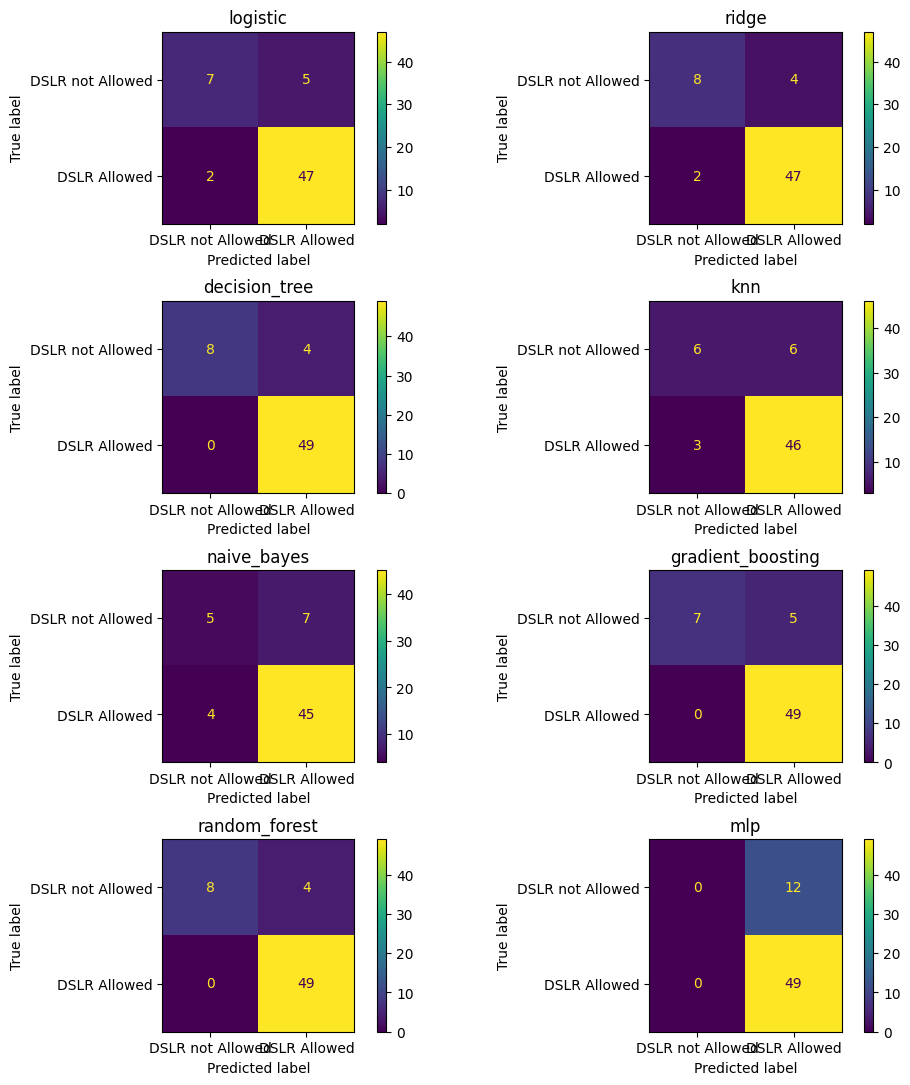

In [161]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

_, ax = plt.subplots(int(len(class_models) / 2), 2, figsize=(12, 10), sharex=False, sharey=False)
for index, key in enumerate(class_models.keys()):
    c_matrix = class_models[key]["Confusion_matrix"]
    disp = ConfusionMatrixDisplay(
        confusion_matrix=c_matrix, display_labels=["DSLR not Allowed", "DSLR Allowed"]
    ).plot(ax=ax.flat[index])
    disp.ax_.set_title(key)

plt.subplots_adjust(top=1, bottom=0, hspace=0.4, wspace=0.1)
plt.show()

Точность, полнота, верность (аккуратность), F-мера

In [162]:
class_metrics = pd.DataFrame.from_dict(class_models, "index")[
    [
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
        "Accuracy_train",
        "Accuracy_test",
        "F1_train",
        "F1_test",
    ]
]
class_metrics.sort_values(
    by="Accuracy_test", ascending=False
).style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=["Accuracy_train", "Accuracy_test", "F1_train", "F1_test"],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
    ],
)

,Precision_train,Precision_test,Recall_train,Recall_test,Accuracy_train,Accuracy_test,F1_train,F1_test
decision_tree,1.000000,0.924528,1.000000,1.000000,1.000000,0.934426,1.000000,0.960784
random_forest,1.000000,0.924528,0.979487,1.000000,0.983402,0.934426,0.989637,0.960784
gradient_boosting,1.000000,0.907407,1.000000,1.000000,1.000000,0.918033,1.000000,0.951456
ridge,1.000000,0.921569,0.943590,0.959184,0.954357,0.901639,0.970976,0.940000
logistic,0.989796,0.903846,0.994872,0.959184,0.987552,0.885246,0.992327,0.930693
knn,0.962963,0.884615,0.933333,0.938776,0.917012,0.852459,0.947917,0.910891
naive_bayes,1.000000,0.865385,0.979487,0.918367,0.983402,0.819672,0.989637,0.891089
mlp,0.809129,0.803279,1.000000,1.000000,0.809129,0.803279,0.894495,0.890909


ROC-кривая, каппа Коэна, коэффициент корреляции Мэтьюса

In [163]:
class_metrics = pd.DataFrame.from_dict(class_models, "index")[
    [
        "Accuracy_test",
        "F1_test",
        "ROC_AUC_test",
        "Cohen_kappa_test",
        "MCC_test",
    ]
]
class_metrics.sort_values(by="ROC_AUC_test", ascending=False).style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=[
        "ROC_AUC_test",
        "MCC_test",
        "Cohen_kappa_test",
    ],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Accuracy_test",
        "F1_test",
    ],
)

,Accuracy_test,F1_test,ROC_AUC_test,Cohen_kappa_test,MCC_test
gradient_boosting,0.918033,0.951456,0.892857,0.692230,0.727544
random_forest,0.934426,0.960784,0.877551,0.762646,0.785081
ridge,0.901639,0.940000,0.846939,0.667877,0.672007
mlp,0.803279,0.890909,0.845238,0.000000,0.000000
logistic,0.885246,0.930693,0.843537,0.599061,0.608106
decision_tree,0.934426,0.960784,0.833333,0.762646,0.785081
knn,0.852459,0.910891,0.820578,0.484507,0.491822
naive_bayes,0.819672,0.891089,0.667517,0.369953,0.375539


In [164]:
best_model = str(class_metrics.sort_values(by="MCC_test", ascending=False).iloc[0].name)

display(best_model)

'decision_tree'

#### Вывод данных с ошибкой предсказания для оценки

In [165]:
preprocessing_result = pipeline_end.transform(X_test)
preprocessed_df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end.get_feature_names_out(),
)

y_pred = class_models[best_model]["preds"]

error_index = y_test[y_test["DSLRAllowed"] != y_pred].index.tolist()
display(f"Error items count: {len(error_index)}")

error_predicted = pd.Series(y_pred, index=y_test.index).loc[error_index]
error_df = X_test.loc[error_index].copy()
error_df.insert(loc=1, column="Predicted", value=error_predicted)
error_df.sort_index()

c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2, 3, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


'Error items count: 4'

,Zone,Predicted,State,City,Name,Type,EstablishmentYear,TimeNeededToVisitInHrs,GoogleReviewRating,EntranceFeeInINR,AirportWith50kmRadius,WeeklyOff,Significance,DSLRAllowed,NumberOfGoogleReviewInLakhs,BestTimeToVisit,ImageURL
54,Eastern,1,Odisha,Puri,Jagannath Temple,Temple,12th century,2.0,4.7,0,Yes,NaN,Religious,0,1.000,All,http://pujacraft.com/cdn/shop/articles/PTI04_2...
118,Southern,1,Tamil Nadu,Kanyakumari,Vivekananda Rock Memorial,Memorial,1970,1.0,4.6,20,Yes,NaN,Historical,0,0.470,Morning,https://upload.wikimedia.org/wikipedia/commons...
186,North Eastern,1,Assam,Kaziranga,Kaziranga National Park,National Park,1905,3.0,4.5,650,No,NaN,Wildlife,0,0.068,Morning,https://upload.wikimedia.org/wikipedia/commons...
234,Central,1,Uttar Pradesh,Lucknow,Bara Imambara,Monument,1784,1.5,4.4,50,Yes,Monday,Historical,0,0.450,All,https://static.toiimg.com/thumb/103890956/Bara...


#### Пример использования обученной модели (конвейера) для предсказания

In [166]:
model = class_models[best_model]["pipeline"]

example_id = 11
test = pd.DataFrame(X_test.iloc[example_id, :]).T
test_preprocessed = pd.DataFrame(preprocessed_df.iloc[example_id, :]).T
display(test)
display(test_preprocessed)
result_proba = model.predict_proba(test)[0]
result = model.predict(test)[0]
real = int(y_test.iloc[example_id].values[0])
display(f"predicted: {result} (proba: {result_proba})")
display(f"real: {real}")

,Zone,State,City,Name,Type,EstablishmentYear,TimeNeededToVisitInHrs,GoogleReviewRating,EntranceFeeInINR,AirportWith50kmRadius,WeeklyOff,Significance,DSLRAllowed,NumberOfGoogleReviewInLakhs,BestTimeToVisit,ImageURL
157,Southern,Karnataka,Bijapur,Gol Gumbaz,Mausoleum,1656,1.5,4.5,20,No,NaN,Historical,1,0.25,All,https://upload.wikimedia.org/wikipedia/commons...


,TimeNeededToVisitInHrs,GoogleReviewRating,EntranceFeeInINR,NumberOfGoogleReviewInLakhs,Zone_Eastern,Zone_North Eastern,Zone_Northern,Zone_Southern,Zone_Western,State_Andhra Pradesh,...,Significance_Scenic,Significance_Scientific,Significance_Shopping,Significance_Spiritual,Significance_Wildlife,BestTimeToVisit_All,BestTimeToVisit_Anytime,BestTimeToVisit_Evening,BestTimeToVisit_Morning,BestTimeToVisit_Night
157,-0.280688,0.001436,-0.164009,-0.23294,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


'predicted: 1 (proba: [0. 1.])'

'real: 1'

#### Подбор гиперпараметров методом поиска по сетке

https://www.kaggle.com/code/sociopath00/random-forest-using-gridsearchcv

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [167]:
from sklearn.model_selection import GridSearchCV

optimized_model_type = "random_forest"
# optimized_model_type = "decision_tree"

random_forest_model = class_models[optimized_model_type]["pipeline"]

param_grid = {
    "model__n_estimators": [10, 20, 30, 40, 50, 100, 150, 200, 250, 500],
    "model__max_features": ["sqrt", "log2", 2],
    "model__max_depth": [2, 3, 4, 5, 6, 7, 8, 9 ,10],
    "model__criterion": ["gini", "entropy", "log_loss"],
}

gs_optomizer = GridSearchCV(
    estimator=random_forest_model, param_grid=param_grid, n_jobs=-1
)
gs_optomizer.fit(X_train, y_train.values.ravel())
gs_optomizer.best_params_

{'model__criterion': 'gini',
 'model__max_depth': 5,
 'model__max_features': 'log2',
 'model__n_estimators': 20}

Обучение модели с новыми гиперпараметрами

In [168]:
pipeline = gs_optomizer.best_estimator_.fit(X_train, y_train.values.ravel())

result = run_classification(pipeline, X_train, X_test, y_train, y_test)

c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2, 3, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Формирование данных для оценки старой и новой версии модели

In [169]:
optimized_metrics = pd.DataFrame(columns=list(result.keys()))
optimized_metrics.loc[len(optimized_metrics)] = pd.Series(
    data=class_models[optimized_model_type]
)
optimized_metrics.loc[len(optimized_metrics)] = pd.Series(
    data=result
)
optimized_metrics.insert(loc=0, column="Name", value=["Old", "New"])
optimized_metrics = optimized_metrics.set_index("Name")

Оценка параметров старой и новой модели

In [170]:
optimized_metrics[
    [
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
        "Accuracy_train",
        "Accuracy_test",
        "F1_train",
        "F1_test",
    ]
].style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=["Accuracy_train", "Accuracy_test", "F1_train", "F1_test"],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
    ],
)

,Precision_train,Precision_test,Recall_train,Recall_test,Accuracy_train,Accuracy_test,F1_train,F1_test
Name,,,,,,,,
Old,1.000000,0.924528,0.979487,1.000000,0.983402,0.934426,0.989637,0.960784
New,0.972527,0.903846,0.907692,0.959184,0.904564,0.885246,0.938992,0.930693


In [171]:
optimized_metrics[
    [
        "Accuracy_test",
        "F1_test",
        "ROC_AUC_test",
        "Cohen_kappa_test",
        "MCC_test",
    ]
].style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=[
        "ROC_AUC_test",
        "MCC_test",
        "Cohen_kappa_test",
    ],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Accuracy_test",
        "F1_test",
    ],
)

,Accuracy_test,F1_test,ROC_AUC_test,Cohen_kappa_test,MCC_test
Name,,,,,
Old,0.934426,0.960784,0.877551,0.762646,0.785081
New,0.885246,0.930693,0.826531,0.599061,0.608106


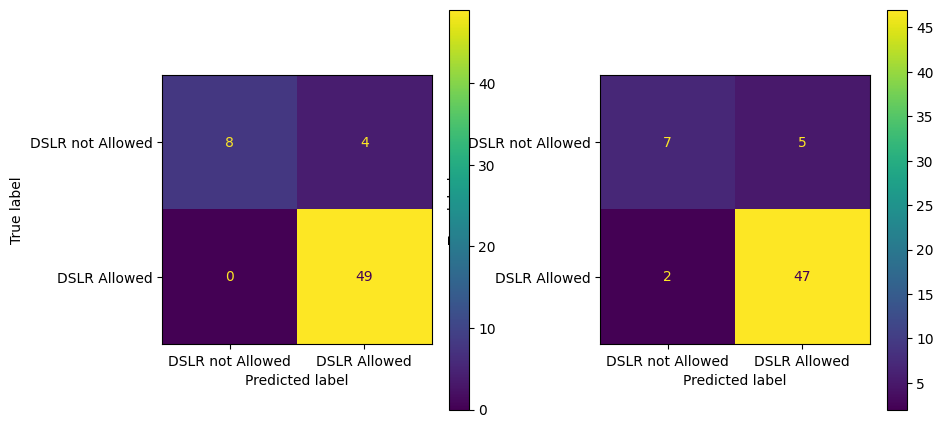

In [172]:
_, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=False, sharey=False
)

for index in range(0, len(optimized_metrics)):
    c_matrix = optimized_metrics.iloc[index]["Confusion_matrix"]
    disp = ConfusionMatrixDisplay(
        confusion_matrix=c_matrix, display_labels=["DSLR not Allowed", "DSLR Allowed"]
    ).plot(ax=ax.flat[index])

plt.subplots_adjust(top=1, bottom=0, hspace=0.4, wspace=0.3)
plt.show()